In [28]:
import pandas as pd
import geopandas as gpd
import matplotlib as plt
from geopy.geocoders import Nominatim 
import folium

In [4]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [5]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [6]:
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [25]:
geolocator = Nominatim(user_agent="Rwanda Deluxe Insights")
location = geolocator.geocode("429 sellers road, Arkansas")

print(location.latitude, location.longitude)
print(location.raw)


35.102832 -92.224287
{'place_id': 240866541, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'way', 'osm_id': 12794609, 'boundingbox': ['35.102782', '35.102882', '-92.224337', '-92.224237'], 'lat': '35.102832', 'lon': '-92.224287', 'display_name': '429, Sellers Road, Beryl, Faulkner County, Arkansas, 72173, United States of America', 'class': 'place', 'type': 'house', 'importance': 0.42099999999999993}


AttributeError: 'GeoDataFrame' object has no attribute 'ax'

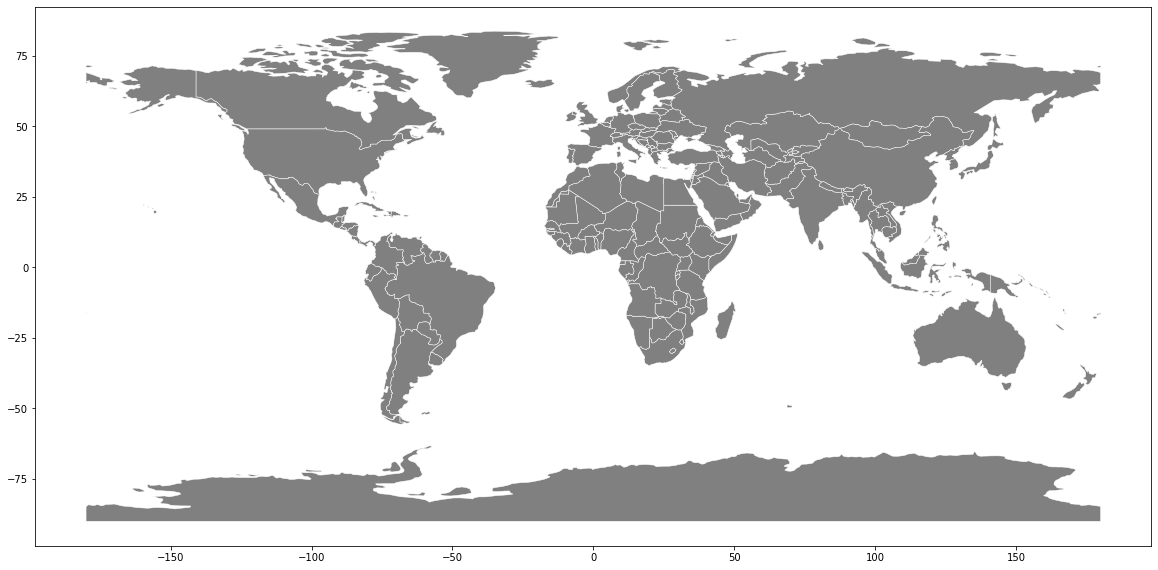

In [27]:
world.plot(color='grey', linewidth=0.5, edgecolor='white', figsize=(20,15))
world.set_ylim([40.4, 47.2])
world.set_xlim([7.0, 14.4])

In [ ]:
# Accomplished with reference to 
# https://www.youtube.com/watch?v=wsSEKm-rU6U
# https://towardsdatascience.com/walkthrough-mapping-basics-with-bokeh-and-geopandas-in-python-43f40aa5b7e9
# https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html